# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [340]:
#if plotnine is not installed in Jupter then use the following command to install it 


In [341]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


Running this project require the following imports 

In [342]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [343]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



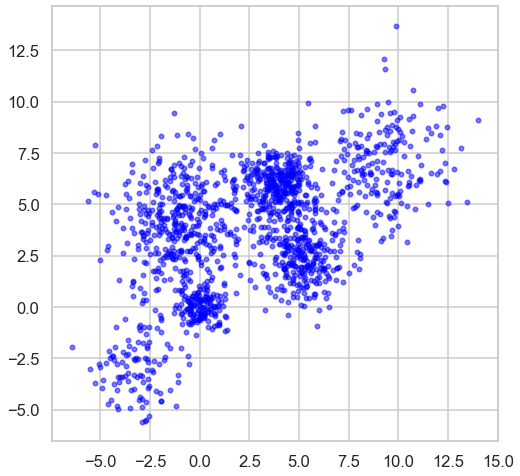

In [344]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

### Kmeans with K = 2

In [345]:
two_clusters = KMeans(n_clusters=2,init="k-means++")
two_clusters.fit(Multi_blob_Data)

KMeans(n_clusters=2)

In [346]:
two_clusters.cluster_centers_

array([[ 5.57064923,  5.0082254 ],
       [-1.14174087,  1.94113519]])

In [347]:
labels = two_clusters.labels_
print(labels)

[1 1 1 ... 0 0 0]


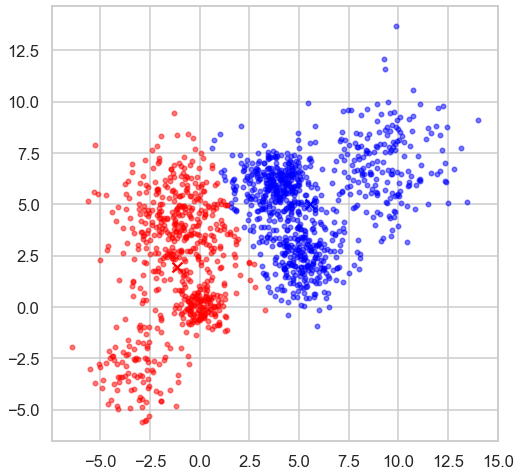

In [348]:
display_cluster(Multi_blob_Data,two_clusters,2)

### Kmeans with k = 6 for example

In [349]:
six_clusters = KMeans(n_clusters=6,init="k-means++")
six_clusters.fit(Multi_blob_Data)

KMeans(n_clusters=6)

In [350]:
six_clusters.cluster_centers_

array([[ 3.85392481,  5.9328261 ],
       [-0.23268607,  0.53744721],
       [-1.25340752,  4.63863648],
       [ 9.36856474,  7.00625988],
       [ 5.18118901,  2.3624744 ],
       [-3.16735394, -3.03549079]])

In [351]:
labels = six_clusters.labels_
print(labels)

[5 5 5 ... 3 0 3]


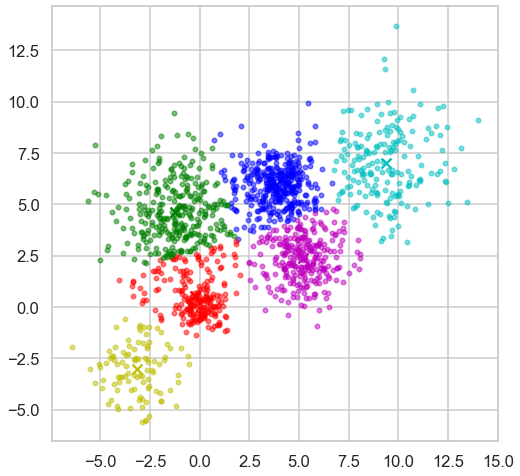

In [352]:
display_cluster(Multi_blob_Data,six_clusters,6)

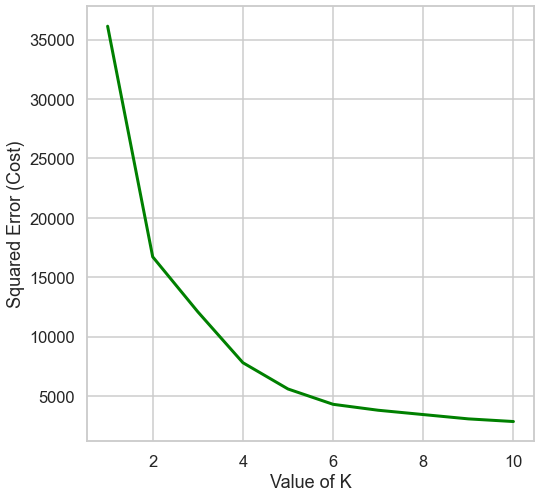

In [353]:
cost =[]
for i in range(1, 11):
    kmeans_clusters= KMeans(n_clusters = i, max_iter = 1000)
    kmeans_clusters.fit(Multi_blob_Data)
     
    # calculates squared error
    # for the clustered points
    cost.append(kmeans_clusters.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

### Based on the above graph which the X-axis represents the number of K(clusters) and Y-axis represents the distortion function which is basically the squared error(cost function), we can see that the elbow of this method is at 2 but it is also unclear if its two or more.

0.4751544541991239
[0]
0.4751544541991239
[0]
0.4751544541991239
[0]
0.4808581335806615
[3]
0.4862240839323367
[4]
0.4862240839323367
[4]
0.4862240839323367
[4]
0.4862240839323367
[4]
0.4862240839323367
[4]


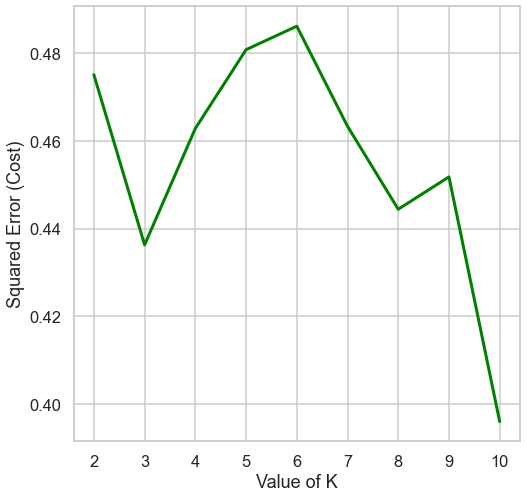

In [354]:
labelss = []
indexx = ""
silhouette =[]
for i in range(2, 11):
    kmeans_clusters= KMeans(n_clusters = i, max_iter = 500)
    kmeans_clusters.fit(Multi_blob_Data)
    #print(kmeans_clusters)
    labelss = kmeans_clusters.labels_
    # calculates squared error
    #print(labels_array)
    # for the clustered points
    #cost.append(kmeans_clusters.inertia_)    
    silhouette.append(silhouette_score(Multi_blob_Data,labelss))

    max_silhouette = max(silhouette)
    print(max_silhouette)
    indexx =np.where(silhouette == max_silhouette)[0]
    print(indexx)
    #str(kmeans_clusters.n_clusters).index(indexx)
   
    #max_index = np.where(max_silhouette == i)[0]
# plot the cost against K values
plt.plot(range(2, 11), silhouette, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

#silhouette = silhouette_score(Multi_blob_Data,labels)
#plt.scatter(,silh)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### Change in affinity with linkage = average and distance_threshold = 2

In [355]:
hc_euclidean = AgglomerativeClustering(n_clusters = 2,affinity = "euclidean",linkage = "average",distance_threshold=None)

hc_manhattan = AgglomerativeClustering(n_clusters = 2,affinity="manhattan",linkage = "average",distance_threshold=None)

hc_cosine = AgglomerativeClustering(n_clusters = 2,affinity="cosine",linkage = "average",distance_threshold=None)

### applying the fit function to apply the Agglomerative Clustering

In [356]:
hc_euclidean.fit(Multi_blob_Data)
hc_euclidean_labels = hc_euclidean.labels_
hc_euclidean_labels

array([1, 1, 1, ..., 0, 0, 0])

In [357]:
hc_manhattan.fit(Multi_blob_Data)
hc_manhattan_labels = hc_euclidean.labels_
hc_manhattan_labels

array([1, 1, 1, ..., 0, 0, 0])

In [358]:
hc_cosine.fit(Multi_blob_Data)
hc_cosine_labels = hc_cosine.labels_
hc_cosine_labels

array([0, 0, 0, ..., 1, 1, 1])

### dendrogram graph of metric "Euclidean distance"

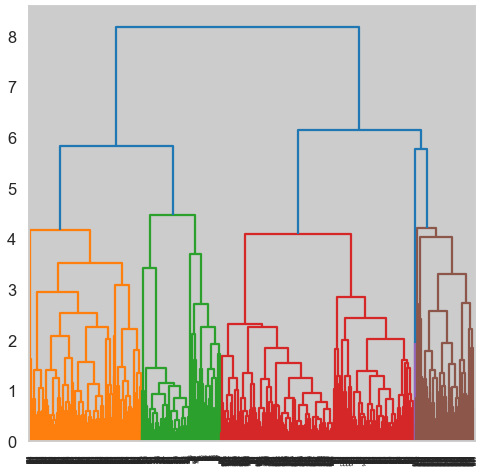

In [359]:
dendograph = sch.dendrogram(sch.linkage(Multi_blob_Data, method = hc_euclidean.linkage ,metric = hc_euclidean.affinity))

### dendrogram graph of metric "manhattan"

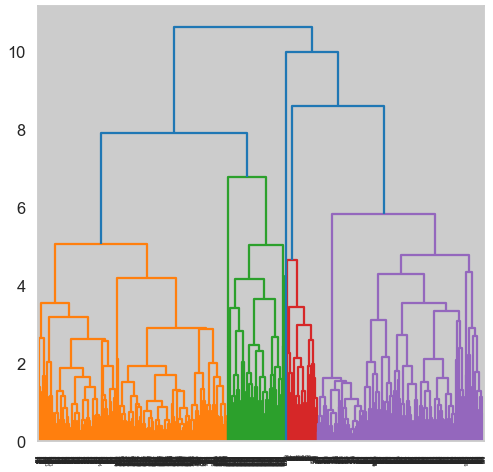

In [360]:
dendograph_3= sch.dendrogram(sch.linkage(Multi_blob_Data, method = hc_manhattan.linkage ,metric = "cityblock"))

### dendrogram graph of metric "cosine"

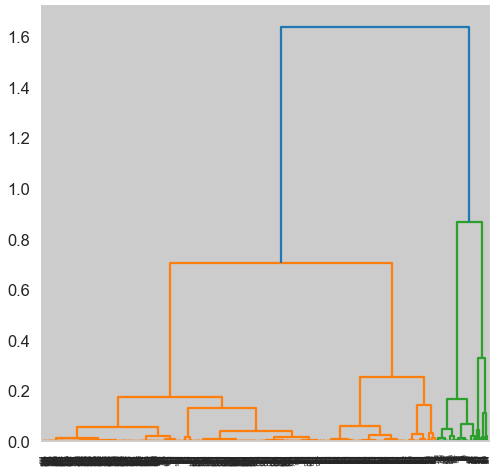

In [361]:
dendograph_2= sch.dendrogram(sch.linkage(Multi_blob_Data, method = hc_cosine.linkage ,metric = hc_cosine.affinity))

### Change in affinity with linkage = single and distance_threshold = 2

In [391]:
hc_euclidean_single = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "single",distance_threshold=None)

hc_manhattan_single = AgglomerativeClustering(n_clusters = 2,affinity="manhattan",linkage = "single",distance_threshold=None)

hc_cosine_single = AgglomerativeClustering(n_clusters = 2,affinity="cosine",linkage = "single",distance_threshold=None)


### applying the fit function to apply the Agglomerative Clustering

In [392]:
hc_euclidean_single.fit(Multi_blob_Data)
print(hc_euclidean_single)
hc_euclidean_single_label = hc_euclidean_single.labels_

AgglomerativeClustering(linkage='single')


In [393]:
hc_manhattan_single.fit(Multi_blob_Data)
hc_manhattan_single_label = hc_manhattan_single.labels_

In [394]:
hc_cosine_single.fit(Multi_blob_Data)
hc_cosine_single_label = hc_cosine_single.labels_

### Silhouette_Score for Hierarchal Clustering

In [395]:
silhouette_score(Multi_blob_Data,labels_euclidean)

0.4716908069861965

In [396]:
silhouette_score(Multi_blob_Data,labels_manhattan)

0.46762361386512785

In [397]:
silhouette_score(Multi_blob_Data,hc_cosine_labels)

0.3525183413155736

In [398]:
silhouette_score(Multi_blob_Data,hc_euclidean_single_label)

0.3218066204847175

In [399]:
silhouette_score(Multi_blob_Data,hc_manhattan_single_label)

0.3218066204847175

In [400]:
silhouette_score(Multi_blob_Data,hc_cosine_single_label)

-0.016763591291336317

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

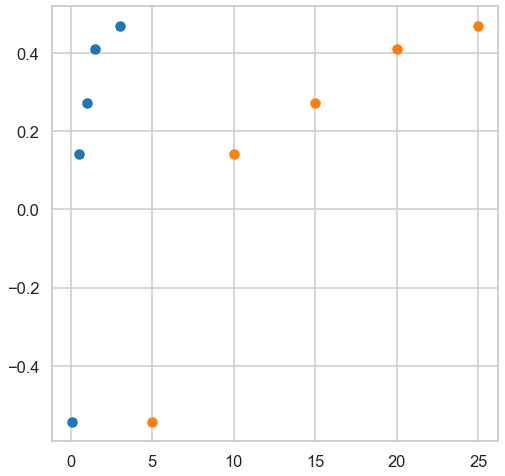

In [372]:
eps = [0.1,0.5,1,1.5,3]
min_samples = [5,10,15,20,25]
db = []
labels = []
db_clustered = []
silhouette = []
for i in range(len(eps)):
    db.append(DBSCAN(eps = eps[i],min_samples = min_samples[i]).fit(Multi_blob_Data))
    labels.append(db[i].fit_predict(Multi_blob_Data))

    #db_clustered = labels[labels[:]>=0]
    silhouette.append(silhouette_score(Multi_blob_Data,labels[i]))
#db_clustered = Multi_blob_Data.iloc[db>=0]

# print(silhouette)
plt.scatter(eps,silhouette)
plt.scatter(min_samples,silhouette)
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

### Gaussian Mixture with "full" covariance type


In [373]:
GM_full = GaussianMixture(n_components= 3,covariance_type="full")
GM_full.fit(Multi_blob_Data)
cluster = GM_full.predict(Multi_blob_Data)
cluster
#print(silhouette_score(Multi_blob_Data,cluster))

array([1, 1, 1, ..., 2, 2, 2])

### Gaussian Mixture with "tied" covariance type


In [374]:
GM_tied = GaussianMixture(n_components=3,covariance_type="tied")
GM_tied.fit(Multi_blob_Data)
cluster = GM_tied.predict(Multi_blob_Data)
cluster

array([0, 0, 0, ..., 2, 1, 2])

### Gaussian Mixture with "diag" covariance type


In [375]:
GM_diag= GaussianMixture(n_components=3,covariance_type="diag")
GM_diag.fit(Multi_blob_Data)
cluster = GM_diag.predict(Multi_blob_Data)
cluster

array([0, 0, 0, ..., 1, 2, 1])

### Gaussian Mixture with "spherical" covariance type + Contour Plot

TypeError: Input z must be 2D, not 1D

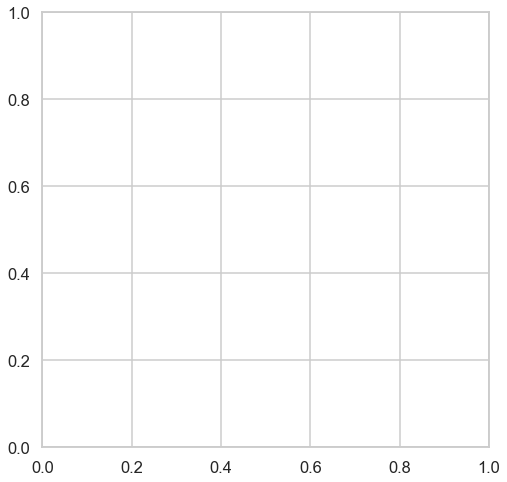

In [376]:
GM_spherical= GaussianMixture(n_components=3,covariance_type="spherical")
GM_spherical.fit(Multi_blob_Data)
cluster = GM_spherical.predict(Multi_blob_Data)
cluster
plt.contourf(cluster)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 